<a href="https://colab.research.google.com/github/imadegunawinangun/RegressionBattery/blob/main/ReggresionBattery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/imadegunawinangun/RegressionBattery

Cloning into 'RegressionBattery'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
!ls RegressionBattery  

NN_INPUT.csv  NN_INPUT.xlsx  NN_OUTPUT.csv  NN_OUTPUT.xlsx


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import pandas as pd
import ntpath
import random
import csv

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 102kB 3.8MB/s 


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import kerastuner.tuners as kt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [ ]:
datadir = 'RegressionBattery/'
df=pd.read_excel(os.path.join(datadir, 'NN_INPUT.xlsx'),header=None)
label = pd.read_excel(os.path.join(datadir, 'NN_OUTPUT.xlsx'),header=None)
pd.set_option('display.max_colwidth', -1)
df[601]=label
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,601
0,0.30000,0.073561,0.147409,0.210614,0.264647,0.300705,0.313644,0.303858,0.272082,0.218681,0.149838,0.074277,0.014634,-0.021616,-0.048814,-0.065958,-0.071474,-0.060520,-0.039829,-0.013576,0.017381,0.083372,0.146865,0.183037,0.172107,0.103393,0.015714,-0.014184,-0.011368,0.018067,0.120867,0.317826,0.513179,0.647989,0.641456,0.428311,0.060998,-0.132606,-0.217928,-0.221580,...,0.050995,0.052858,0.053437,0.051989,0.048335,0.042475,0.034971,0.026178,0.016871,0.013043,0.008305,0.005969,0.006922,0.00982,0.013337,0.017877,0.025037,0.029314,0.030527,0.028174,0.022658,0.017104,0.015104,0.013825,0.013125,0.01293,0.013175,0.013796,0.014481,0.015152,0.017491,0.017908,0.019863,0.021771,0.023714,0.025631,0.027025,0.02738,0.026312,0.1
1,0.29000,0.073561,0.147409,0.210614,0.264647,0.300705,0.313644,0.303858,0.272082,0.218681,0.149838,0.074277,0.014634,-0.021616,-0.048814,-0.065958,-0.071474,-0.060520,-0.039829,-0.013576,0.017381,0.083372,0.146865,0.183037,0.172107,0.103393,0.015714,-0.014184,-0.011368,0.018067,0.120867,0.317826,0.513179,0.647989,0.641456,0.428311,0.060998,-0.132606,-0.217928,-0.221580,...,0.050995,0.052858,0.053437,0.051989,0.048335,0.042475,0.034971,0.026178,0.016871,0.013043,0.008305,0.005969,0.006922,0.00982,0.013337,0.017877,0.025037,0.029314,0.030527,0.028174,0.022658,0.017104,0.015104,0.013825,0.013125,0.01293,0.013175,0.013796,0.014481,0.015152,0.017491,0.017908,0.019863,0.021771,0.023714,0.025631,0.027025,0.02738,0.026312,0.1
2,0.28000,0.073561,0.147409,0.210614,0.264647,0.300705,0.313644,0.303858,0.272082,0.218681,0.149838,0.074277,0.014634,-0.021616,-0.048814,-0.065958,-0.071474,-0.060520,-0.039829,-0.013576,0.017381,0.083372,0.146865,0.183037,0.172107,0.103393,0.015714,-0.014184,-0.011368,0.018067,0.120867,0.317826,0.513179,0.647989,0.641456,0.428311,0.060998,-0.132606,-0.217928,-0.221580,...,0.050995,0.052858,0.053437,0.051989,0.048335,0.042475,0.034971,0.026178,0.016871,0.013043,0.008305,0.005969,0.006922,0.00982,0.013337,0.017877,0.025037,0.029314,0.030527,0.028174,0.022658,0.017104,0.015104,0.013825,0.013125,0.01293,0.013175,0.013796,0.014481,0.015152,0.017491,0.017908,0.019863,0.021771,0.023714,0.025631,0.027025,0.02738,0.026312,0.1
3,0.27000,0.073561,0.147409,0.210614,0.264647,0.300705,0.313644,0.303858,0.272082,0.218681,0.149838,0.074277,0.014634,-0.021616,-0.048814,-0.065958,-0.071474,-0.060520,-0.039829,-0.013576,0.017381,0.083372,0.146865,0.183037,0.172107,0.103393,0.015714,-0.014184,-0.011368,0.018067,0.120867,0.317826,0.513179,0.647989,0.641456,0.428311,0.060998,-0.132606,-0.217928,-0.221580,...,0.050995,0.052858,0.053437,0.051989,0.048335,0.042475,0.034971,0.026178,0.016871,0.013043,0.008305,0.005969,0.006922,0.00982,0.013337,0.017877,0.025037,0.029314,0.030527,0.028174,0.022658,0.017104,0.015104,0.013825,0.013125,0.01293,0.013175,0.013796,0.014481,0.015152,0.017491,0.017908,0.019863,0.021771,0.023714,0.025631,0.027025,0.02738,0.026312,0.1
4,0.26000,0.073561,0.147409,0.210614,0.264647,0.300705,0.313644,0.303858,0.272082,0.218681,0.149838,0.074277,0.014634,-0.021616,-0.048814,-0.065958,-0.071474,-0.060520,-0.039829,-0.013576,0.017381,0.083372,0.146865,0.183037,0.172107,0.103393,0.015714,-0.014184,-0.011368,0.018067,0.120867,0.317826,0.513179,0.647989,0.641456,0.428311,0.060998,-0.132606,-0.217928,-0.221580,...,0.050995,0.052858,0.053437,0.051989,0.048335,0.042475,0.034971,0.026178,0.016871,0.013043,0.008305,0.005969,0.006922,0.00982,0.013337,0.017877,0.025037,0.029314,0.030527,0.028174,0.022658,0.017104,0.015104,0.013825,0.013125,0.01293,0.013175,0.013796,0.014481,0.015152,0.017491,0.017908,0.019863,0.021771,0.023714,0.025631,0.027025,0.02738,0.026312,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

<BarContainer object of 10 artists>

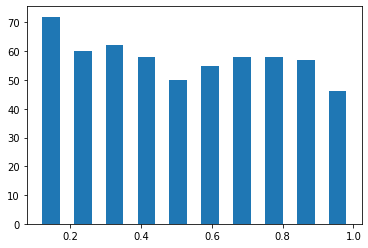

In [ ]:
num_bins = 10
hist, bins = np.histogram(label[0], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)


In [ ]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,461.0,0.176745,0.116511,0.000100,0.030000,0.224000,0.275200,0.330000
1,461.0,0.058854,0.071671,-0.140519,0.014994,0.073561,0.115707,0.144951
2,461.0,0.085517,0.096743,-0.185782,0.023977,0.127377,0.147409,0.215287
3,461.0,0.100886,0.121298,-0.204950,0.000000,0.118720,0.210614,0.274317
4,461.0,0.114036,0.134918,-0.203877,0.000000,0.119391,0.264647,0.302397
...,...,...,...,...,...,...,...,...
596,461.0,0.069915,0.181603,-0.083078,-0.000143,0.000000,0.025631,0.456336
597,461.0,0.076755,0.177314,-0.030682,-0.011194,0.000000,0.027025,0.458834
598,461.0,0.078806,0.175120,-0.014412,-0.012480,0.000000,0.027380,0.456707
599,461.0,0.076142,0.172966,-0.031189,-0.004879,0.000000,0.026312,0.448847


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(601)
test_labels = test_features.pop(601)


In [ ]:
train_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
414,0.002018,0.115707,0.215287,0.274317,0.302397,0.303229,0.284524,0.255105,0.219821,0.183164,0.150725,0.122407,0.098441,0.079858,0.067125,0.060564,0.060399,0.065361,0.070203,0.073348,0.074923,0.074783,0.072894,0.069248,0.064192,0.060036,0.057317,0.056120,0.056429,0.058239,0.061585,0.066519,0.072970,0.079781,0.081434,0.076319,0.064104,0.044897,0.022857,0.005502,...,0.376290,0.377720,0.380096,0.383502,0.388338,0.394754,0.402813,0.412581,0.424832,0.439716,0.456766,0.475089,0.490726,0.502487,0.510247,0.513517,0.511897,0.506290,0.499826,0.493372,0.486973,0.480670,0.474502,0.468508,0.462724,0.457186,0.451930,0.446988,0.442596,0.439608,0.438457,0.438863,0.441045,0.444901,0.448922,0.452739,0.456336,0.458834,0.456707,0.448847
96,0.265000,0.026155,0.054080,0.071790,0.078588,0.072685,0.055741,0.039670,0.028421,0.021215,0.020979,0.023061,0.020533,0.016699,0.007720,-0.003559,-0.013805,-0.016337,-0.012267,-0.000888,0.008191,0.014581,0.026881,0.040758,0.055279,0.071355,0.085519,0.097187,0.103830,0.103570,0.095600,0.081523,0.065263,0.049566,0.035292,0.023913,0.019220,0.017261,0.018643,0.023282,...,0.710498,0.656102,0.593100,0.530620,0.471463,0.416999,0.371694,0.338804,0.320338,0.317153,0.329724,0.353596,0.370434,0.375470,0.368291,0.348311,0.317968,0.289482,0.266559,0.249800,0.239058,0.234101,0.233989,0.238508,0.247795,0.261904,0.273886,0.253327,0.193049,0.092955,-0.022010,-0.139839,-0.217748,-0.244727,-0.223728,-0.162931,-0.083078,-0.030682,-0.014412,-0.031189
480,0.291000,0.014994,0.023977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018866,0.189229,0.429128,0.544688,0.455607,0.312028,0.216280,0.209510,0.288117,0.366263,0.414209,0.422164,0.382744,0.296729,0.172798,0.024420,-0.095546,-0.197441,-0.219877,-0.181150,-0.117865,-0.071429,...,0.137538,0.087230,0.056292,0.044881,0.051024,0.066724,0.090311,0.121932,0.162282,0.205663,0.222390,0.203419,0.145341,0.058407,0.001352,-0.035917,-0.058254,-0.066449,-0.060842,-0.043221,-0.015417,0.022029,0.074997,0.070256,0.002972,-0.093804,-0.181419,-0.190554,-0.143411,-0.085124,-0.035487,0.001602,0.014519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
318,0.000200,-0.140519,-0.185782,-0.204950,-0.203877,-0.188184,-0.163691,-0.137148,-0.110467,-0.084027,-0.060112,-0.040557,-0.027157,-0.018496,-0.013127,-0.010091,-0.006917,-0.000126,0.005746,0.010165,0.013125,0.014600,0.015158,0.017739,0.023636,0.017828,0.022374,0.032021,0.049437,0.072811,0.101758,0.134824,0.160644,0.165181,0.139159,0.084287,0.020668,-0.005408,-0.014474,-0.009847,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
540,0.012090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018493,0.108016,0.214906,0.290445,0.367015,0.484669,0.662650,0.800261,0.800329,0.649983,0.469062,0.321419,0.229845,0.197277,0.213491,0.235863,0.252949,0.264705,0.270252,0.268967,0.260519,0.246462,0.233575,0.224067,0.218305,0.215854,0.214005,0.212038,0.209947,0.206972,0.199999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,.

In [ ]:
train_labels

414    1.0
96     0.3
480    0.8
318    0.2
540    0.6
      ... 
542    0.7
182    0.2
32     0.4
80     0.1
307    0.2
Name: 601, Length: 461, dtype: float64

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
0,0.176745,0.116511
1,0.058854,0.071671
2,0.085517,0.096743
3,0.100886,0.121298
4,0.114036,0.134918
...,...,...
596,0.069915,0.181603
597,0.076755,0.177314
598,0.078806,0.175120
599,0.076142,0.172966


In [ ]:
def nn_supercapacitor(hp):
  model = keras.Sequential()
  for i in range(hp.Int("Dense Layers", min_value=1, max_value=10)):
      model.add(keras.layers.Dense(hp.Choice(f"Dense_{i}_layer", [32,64,128,256,512,16,8]), 
                                   activation='relu'))

  model.add(layers.Dense(1))
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(hp.Choice(f"learning_rate", [1e-2, 1e-3, 1e-5, 1e-8])))
  return model
def nn_supercapacitor():
  model = keras.Sequential()
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(16, activation='relu'))
  model.add(keras.layers.Dense(32, activation='relu'))

  model.add(layers.Dense(1))
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(1e-5))
  return model

In [ ]:
model = nn_supercapacitor()
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
     epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 21ms/step - loss: 0.6404 - val_loss: 0.4662
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5729 - val_loss: 0.4167
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5459 - val_loss: 0.3797
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5156 - val_loss: 0.3559
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5003 - val_loss: 0.3335
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4190 - val_loss: 0.3150
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4255 - val_loss: 0.2968
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3803 - val_loss: 0.2805
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3837 - val_loss: 0.2631
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3487 - val_loss: 0.2460
Epoch 11

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               76928     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 79,569
Trainable params: 79,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the keras model
error = model.evaluate(x=test_features , y = test_labels)
print('Error: %.2f'% (error))

4/4 [==============================] - 0s 3ms/step - loss: 0.0818
Error: 0.08


Text(0.5, 0, 'Epoch')

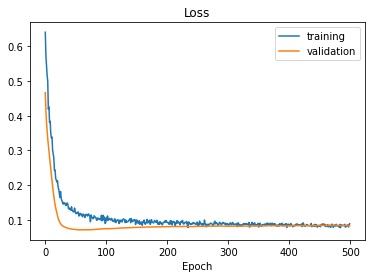

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')


In [ ]:
#for layer in model.layers: 
#    if len(layer.get_weights()) > 0: 
#        print(layer.name, layer.get_weights()) 

In [ ]:
class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`

    super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(nn_supercapacitor,
                objective='val_loss',
                max_trials=1000,)
# Don't pass epochs or batch_size here, let the Tuner tune them.

tuner.search(
    train_features, train_labels,
        validation_split=0.2,
            epochs=1000,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_loss',
              patience=100,
              )
              ]
             )


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
Dense Layers      |8                 |?                 
Dense_0_layer     |16                |?                 
learning_rate     |1e-05             |?                 

Epoch 1/1000
12/12 [==============================] - 1s 28ms/step - loss: 0.3695 - val_loss: 0.3042
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.3675 - val_loss: 0.3025
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.3655 - val_loss: 0.3007
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.3634 - val_loss: 0.2990
Epoch 5/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.3949

KeyboardInterrupt: ignored